In [25]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statistics
%matplotlib inline

In [36]:
# LOADING  the files 
workout_data = pd.read_csv('Downloads/data/workout.csv')
workout_data.head()


,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [27]:
workout_geo_data = pd.read_csv('Downloads/data/workout_geo.csv') 
workout_geo_data.head()


,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


In [28]:
three_keywords_data = pd.read_csv('Downloads/data/three_keywords.csv')
three_keywords_data.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


In [29]:
three_keywords_geo_data = pd.read_csv('Downloads/data/three_keywords_geo.csv')
three_keywords_geo_data.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN



 
#### When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".


# Objective:1 
### When was the global search for 'workout' at its peak?

year where search: "workout"
 was at its peak: 2020-04
year where "workout" was at its peak in the format yyyy:  2020


<Figure size 640x480 with 0 Axes>

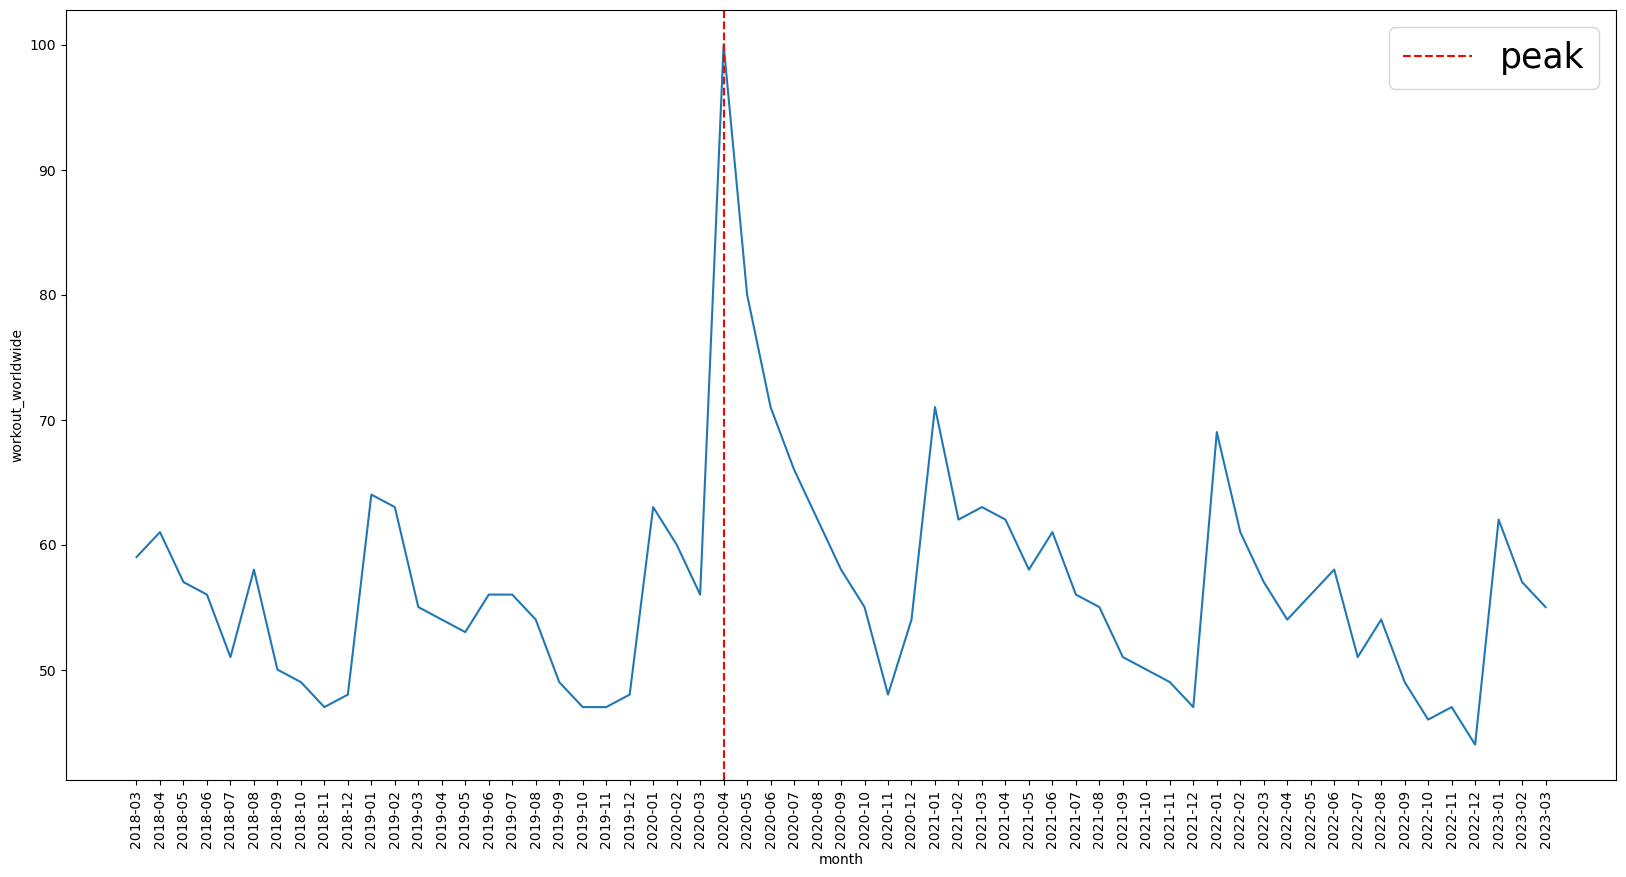

In [30]:
#option 1 👇🏽👇🏽👇🏽👇🏽
year_str = workout_data.loc[workout_data["workout_worldwide"].idxmax(),"month"]
print('year where search: "workout"\n was at its peak:', year_str)
print('year where "workout" was at its peak in the format yyyy: ', year_str[:4])

#option 2 👇🏽👇🏽👇🏽👇🏽
#plot to visualize and verify  peak 'workout' searches year
plt.figure(figsize=(20, 10))
plt.plot(workout_data["month"],workout_data["workout_worldwide"])
plt.xticks(rotation=90)
plt.xlabel("month")
plt.ylabel("workout_worldwide")
plt.axvline(x = "2020-04" ,color = 'r',linestyle = '--', label='peak')
plt.legend(fontsize = 25)
plt.show()
plt.savefig('peak_covid_workout_worldwide.png')


# Objective:2
### Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now?

<Figure size 640x480 with 0 Axes>

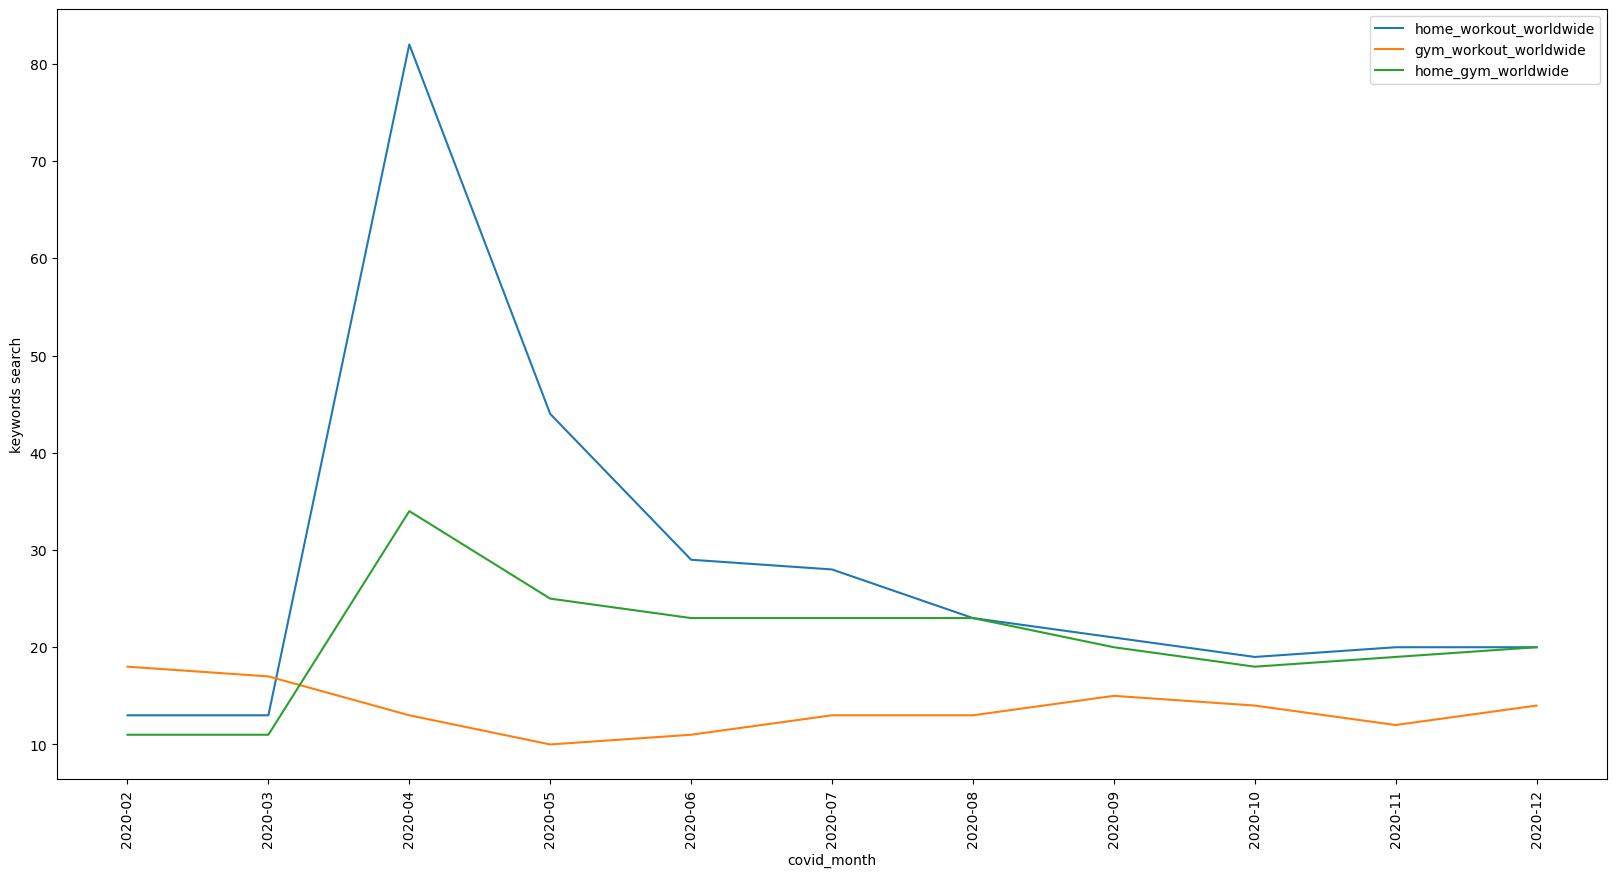

In [31]:
key_words  = ['home_workout_worldwide','gym_workout_worldwide','home_gym_worldwide']
# Calculate average popularity during COVID
covid_season = three_keywords_data[(three_keywords_data['month'] >= '2020-02' ) & (three_keywords_data['month'] <= '2020-12')]
#covid_season['month'].to_datetime('%yyyy-%m')
covid_season_df = pd.DataFrame(covid_season)

#remember this is a datframe insatnce
fig, ax  = plt.subplots(figsize = (20,10))
ax.plot(covid_season_df['month'],covid_season_df['home_workout_worldwide'],label = 'home_workout_worldwide')
ax.plot(covid_season_df['month'],covid_season_df['gym_workout_worldwide'],label = 'gym_workout_worldwide')
ax.plot(covid_season_df['month'],covid_season_df['home_gym_worldwide'],label = 'home_gym_worldwide')
ax.legend()
plt.xlabel('covid_month')
plt.ylabel('keywords search')
plt.xticks(rotation = 90)
plt.show() 
plt.savefig('workout_serches_covid_peak.png')



<Figure size 640x480 with 0 Axes>

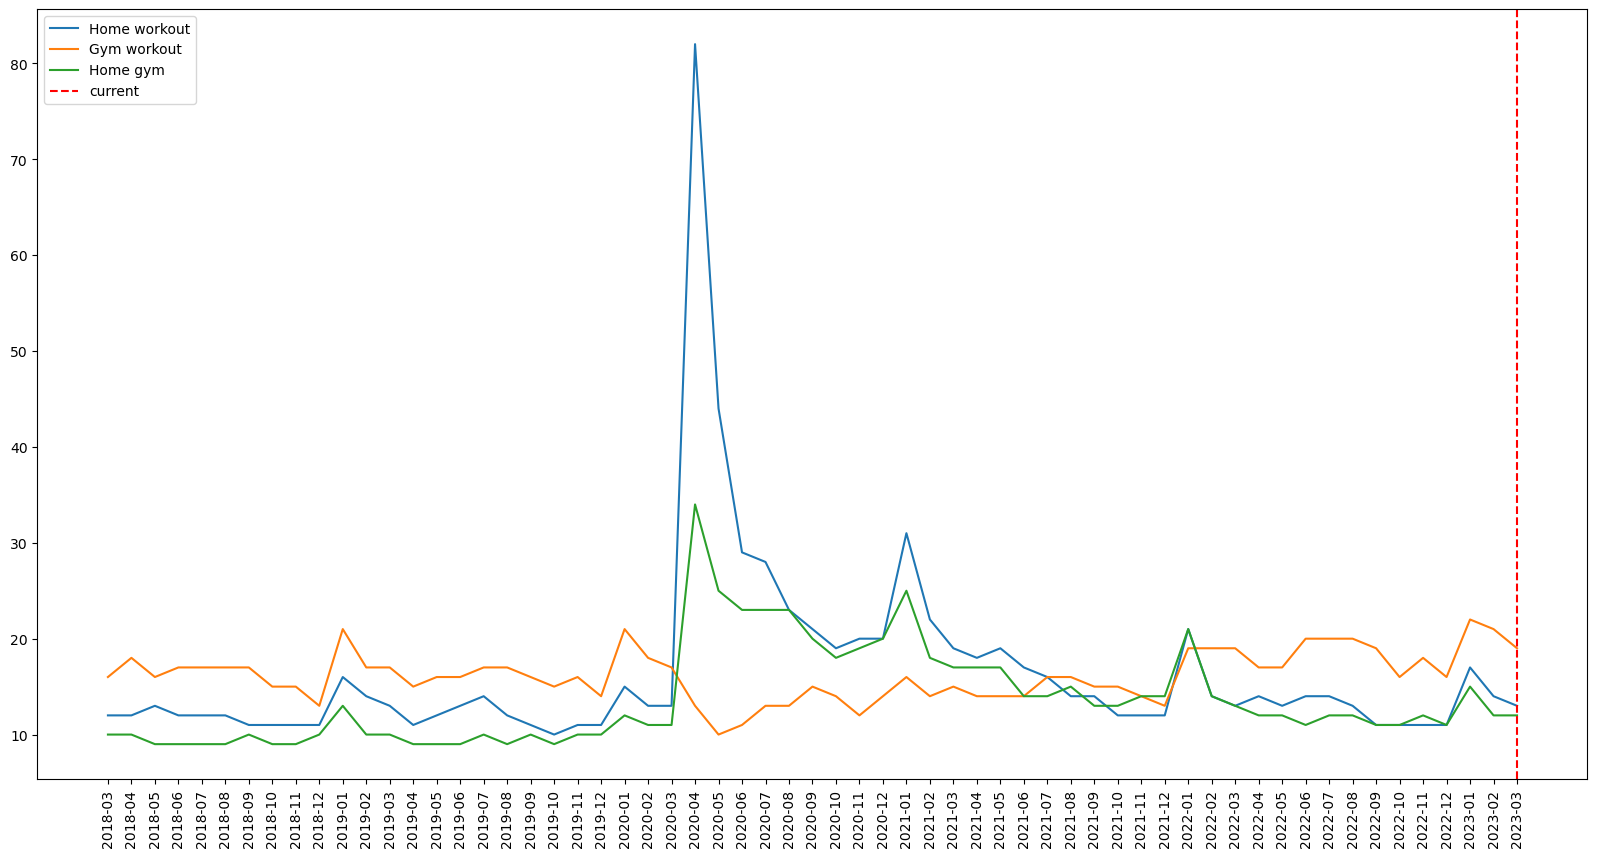

In [32]:


# Finding the most popular keywords for the current year 
plt.figure(figsize=(20, 10))
plt.plot(three_keywords_data["month"], three_keywords_data["home_workout_worldwide"], label="Home workout")
plt.plot(three_keywords_data["month"], three_keywords_data["gym_workout_worldwide"], label="Gym workout")
plt.plot(three_keywords_data["month"], three_keywords_data["home_gym_worldwide"], label="Home gym")
plt.xticks(rotation=90)
plt.axvline('2023-03',color = 'r',linestyle = '--',label = 'current')
plt.legend()
plt.show()
plt.savefig('current searches.png')


#peak_covid = "home workout"
#current = "gym workout"

### From the above graph, looks like "home_workout_worldwide" was the most popupar search during covid pandemic

# Objective:3 
### What country has the highest interest for workouts among the following: United States, Australia, or Japan?

In [33]:
subset_df = workout_geo_data.loc[(workout_geo_data['country'] == 'United States') | (workout_geo_data['country'] == 'Australia') | (workout_geo_data['country'] == 'Japan')]
print(subset_df)
# Based on the sebset USA has the optimal  Index representing the popularity of the keyword 'workout' during the 5 year period.
top_country =  'United States'


           country  workout_2018_2023
5    United States              100.0
18       Australia               77.0
216          Japan                1.0


# Objective:4
### You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts?

In [34]:
home_workout = three_keywords_geo_data.loc[(three_keywords_geo_data['Country'] == 'Philippines') | (three_keywords_geo_data['Country'] == 'Malaysia')]
home_workout

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
23,Philippines,52.0,38.0,10.0
61,Malaysia,47.0,38.0,15.0


In [35]:
home_workout_geo = 'Philippines '